In [45]:
import matplotlib.colors as mc # For the legend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.cm import ScalarMappable

In [223]:
data = pd.read_excel(r"C:\Users\joc_h\Desktop\CU.xlsx")

In [224]:
data["Date"] = pd.to_datetime(data["Date"])

In [225]:
data.set_index('Date', inplace=True)

In [226]:
promedio = data.groupby(pd.Grouper(freq="H")).mean()

In [227]:
promedio

,MAS
Date,
2023-12-01 00:00:00,14.689167
2023-12-01 01:00:00,15.912500
2023-12-01 02:00:00,15.369167
2023-12-01 03:00:00,14.981667
2023-12-01 04:00:00,15.332500
...,...
2023-12-31 19:00:00,16.851667
2023-12-31 20:00:00,16.850833
2023-12-31 21:00:00,16.830000


In [228]:
promedio_reset = promedio.reset_index()

In [229]:
promedio_reset

,Date,MAS
0,2023-12-01 00:00:00,14.689167
1,2023-12-01 01:00:00,15.912500
2,2023-12-01 02:00:00,15.369167
3,2023-12-01 03:00:00,14.981667
4,2023-12-01 04:00:00,15.332500
...,...,...
739,2023-12-31 19:00:00,16.851667
740,2023-12-31 20:00:00,16.850833
741,2023-12-31 21:00:00,16.830000
742,2023-12-31 22:00:00,16.770000


In [230]:
# Subset data
subset = promedio_reset[(promedio_reset["Date"].dt.year == 2023) & (promedio_reset["Date"].dt.month == 12)]

In [231]:
subset

,Date,MAS
0,2023-12-01 00:00:00,14.689167
1,2023-12-01 01:00:00,15.912500
2,2023-12-01 02:00:00,15.369167
3,2023-12-01 03:00:00,14.981667
4,2023-12-01 04:00:00,15.332500
...,...,...
739,2023-12-31 19:00:00,16.851667
740,2023-12-31 20:00:00,16.850833
741,2023-12-31 21:00:00,16.830000
742,2023-12-31 22:00:00,16.770000


In [232]:
# Extract hour, day, and MAS
hour = subset["Date"].dt.hour
day = subset["Date"].dt.day
MAS = subset["MAS"]

In [234]:
MAS = MAS.values.reshape(24, len(day.unique()), order="F")

In [326]:
MASPLUS = MAS[19:24]

In [311]:
MASPLUS2 = MAS[0:7]

In [290]:
MASPLUSEXTRA = np.concatenate((MASPLUS, MASPLUS2), axis = 0)

In [291]:
MASPLUSEXTRA

array([[15.45583333, 14.5275    , 14.83166667, 14.61      , 15.83416667,
        14.05833333, 14.015     , 16.73666667, 15.365     , 14.63      ,
        15.28833333, 15.74333333, 14.41083333, 14.11083333, 14.15916667,
        16.7525    , 16.96916667, 16.8275    , 16.07833333, 14.9625    ,
        14.59666667, 15.25666667, 16.135     , 16.41833333, 14.83833333,
        14.48833333, 16.9125    , 16.98666667, 16.85833333, 16.58166667,
        16.85166667],
       [14.88666667, 14.51666667, 14.5075    , 16.40416667, 15.3575    ,
        14.1225    , 13.9675    , 16.5275    , 15.05583333, 15.94833333,
        16.2775    , 15.81583333, 15.04083333, 14.84416667, 15.06583333,
        16.62416667, 17.02666667, 16.8825    , 16.50416667, 15.82916667,
        14.50833333, 14.515     , 14.92916667, 16.16583333, 15.69083333,
        14.31916667, 16.9575    , 17.01      , 16.81833333, 16.78583333,
        16.85083333],
       [14.75083333, 14.7825    , 14.64083333, 15.32083333, 14.06666667,
       

In [327]:
xgrid = np.arange(day.max() + 1) + 1

In [328]:
ygrid = np.arange(6)

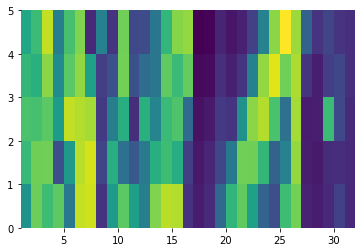

In [331]:
fig, ax = plt.subplots()
ax.pcolormesh(xgrid, ygrid, MASPLUS, cmap='viridis_r')
ax.set_frame_on(False)

In [39]:
subset = data[(data["date"].dt.year == 2004) & (data["date"].dt.month == 1)]

In [40]:
# Extract hour, day, and temperature
hour = subset["hour"]
day = subset["date"].dt.day
temp = subset["temp"]

In [150]:
temp = temp.values.reshape(24, len(day.unique()), order="F")

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [42]:
temp

array([[-1.7 ,  0.5 , -0.4 , -5.5 , -6.7 , -4.8 , -3.9 , -4.7 , -0.7 ,
        -2.8 , -2.8 , -3.4 , -0.9 , -2.5 ,  0.2 ,  1.3 , -0.5 , -4.  ,
         0.  , -2.9 , -4.8 , -5.2 , -2.3 , -2.1 , -5.4 , -6.8 , -2.3 ,
        -3.8 , -4.5 , -0.4 , -4.7 ],
       [-1.8 ,  0.4 , -0.5 , -5.5 , -6.7 , -5.  , -2.7 , -5.2 , -0.6 ,
        -2.5 , -3.3 , -3.4 , -0.1 , -2.7 , -0.7 , -0.7 , -0.7 , -3.2 ,
         0.3 , -4.2 , -4.9 , -5.  , -2.3 , -1.6 , -4.4 , -6.7 , -2.2 ,
        -4.4 , -5.1 , -1.3 , -5.  ],
       [-1.8 ,  0.3 , -0.7 , -6.1 , -7.2 , -5.  , -2.2 , -5.7 , -0.4 ,
        -2.8 , -3.  , -3.  , -1.4 , -3.  ,  0.2 , -1.5 , -0.3 , -3.3 ,
        -0.3 , -4.6 , -5.4 , -5.2 , -2.  , -1.9 , -4.6 , -7.2 , -2.43,
        -4.2 , -5.1 , -2.1 , -4.9 ],
       [-2.2 ,  0.3 , -1.  , -6.3 , -7.1 , -5.8 , -1.4 , -5.3 , -0.8 ,
        -2.9 , -2.6 , -3.7 , -2.1 , -2.7 ,  3.5 , -3.3 , -0.7 , -3.2 ,
        -0.7 , -4.9 , -5.6 , -5.5 , -2.1 , -2.  , -4.1 , -7.6 , -2.6 ,
        -3.9 , -5.9 , -2.7 , -4.8 ],


In [43]:
xgrid = np.arange(day.max() + 1) + 1

# Hours start at 0, length 2
ygrid = np.arange(25)

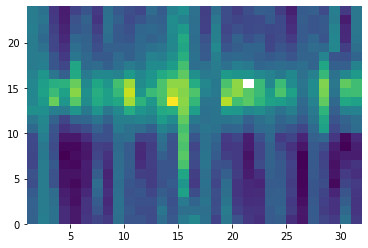

In [44]:
fig, ax = plt.subplots()
ax.pcolormesh(xgrid, ygrid, temp)
ax.set_frame_on(False) # remove all spines